# Get midpoints locations, line lengths and angles from a line shapefile

This is useful to convert fracture network data to a format that can be used by numerical models of fluid flow, heat flow or geomechanics of fracture networks


## Import Python modules

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import geopandas as gp

## Filename for input line shapefile & output csv file

In [2]:
# filename of a shapefile containing line shapes
fn_in = 'data/fractures_projected_to_plane.shp'

# filename for the output file generated by this notebook
fn_out = 'data/midpoints_lengths_angles.csv'

# filename for an output figure of the fracture network
fnf = 'fig/midpoints_and_lines.pdf'

## Load shapefile

In [3]:
shp = gp.read_file(fn_in)

## Get midpoints, lengths and angles of each line in the shapefile

In [4]:
columns = ['shape_type', 'midpoint_x', 'midpoint_y', 'length', 'angle_with_horizontal']
index = shp.index
df_midpoints = pd.DataFrame(columns=columns, index=index)

xms = np.zeros_like(index)
yms = np.zeros_like

print('going through all lines')

for ix in index:
    
    segment_type = shp.loc[ix, 'geometry'].type
    
    df_midpoints.loc[ix, 'shape_type'] = segment_type
    
    if  segment_type == 'LineString':

        x, y = shp.loc[ix, 'geometry'].xy[:]

        xm = (x[0] + x[-1]) / 2.0
        ym = (y[0] + y[-1]) / 2.0

        dx = x[-1] - x[0]
        dy = y[-1] - y[0]

        length = np.sqrt(dx**2 + dy**2)

        df_midpoints.loc[ix, 'midpoint_x'] = xm
        df_midpoints.loc[ix, 'midpoint_y'] = ym
        df_midpoints.loc[ix, 'dx'] = dx
        df_midpoints.loc[ix, 'dy'] = dy
        df_midpoints.loc[ix, 'length'] = length

        angle = np.degrees(np.arctan2(dy, dx))

        if angle < 0:
            angle += 360.

        df_midpoints.loc[ix, 'angle_with_horizontal'] = angle

print('done processing the line shapes')

going through all lines
done processing the line shapes


In [5]:
df_midpoints

,shape_type,midpoint_x,midpoint_y,length,angle_with_horizontal,dx,dy
0,LineString,6.82419,3.61857,14.1351,198.548,-13.400891,-4.496462
1,LineString,11.8743,4.90649,0.866343,263.229,-0.102148,-0.860300
2,LineString,12.4951,5.01356,1.23922,197.587,-1.181302,-0.374426
3,LineString,12.0398,4.70596,0.350055,258.042,-0.072532,-0.342458
4,LineString,7.44208,2.95459,12.2843,198.099,-11.676473,-3.816123
...,...,...,...,...,...,...,...
463,LineString,4.98757,2.15386,0.19585,96.1729,-0.021060,0.194715
464,LineString,4.0844,2.76446,0.139056,164.451,-0.133966,0.037276
465,LineString,4.72613,2.90173,0.1734,112.892,-0.067452,0.159743
466,LineString,1.86042,2.37244,0.310844,305.289,0.179576,-0.253725


## Save csv file with midpoints, lines and angles

In [6]:
print('saving csv file with midpoints, angles and trace lengths as %s' % fn_out)

df_midpoints.to_csv(fn_out)

print('done')

saving csv file with midpoints, angles and trace lengths as data/midpoints_lengths_angles.csv
done


## Make a figure with the original fracture dataset and the simplified fracture network

saving figure as fig/midpoints_and_lines.pdf


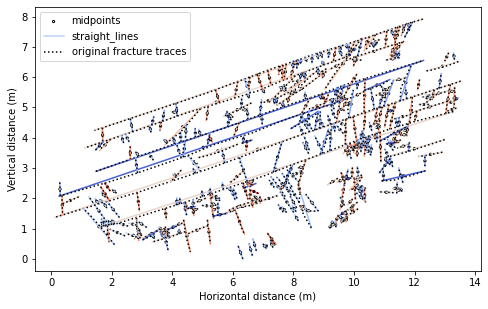

In [7]:
cmap = pl.get_cmap('coolwarm')
s = 5

colors = [cmap(i) for i in df_midpoints['angle_with_horizontal'].values / 360.]

fig, ax = pl.subplots(1, 1, figsize=(8, 6))

ax.set_aspect('equal')

legm = ax.scatter(df_midpoints['midpoint_x'], df_midpoints['midpoint_y'], 
           edgecolor='black', facecolor='None', s=s)

for ix, c in zip(df_midpoints.index, colors):
    xm = df_midpoints.loc[ix, 'midpoint_x']
    ym = df_midpoints.loc[ix, 'midpoint_y']
    
    angle = df_midpoints.loc[ix, 'angle_with_horizontal'] 
    
    length = df_midpoints.loc[ix, 'length']
    
    dxp = np.cos(np.radians(angle)) * length / 2.0
    dyp = np.sin(np.radians(angle)) * length / 2.0
    
    dxp2 = df_midpoints.loc[ix, 'dx']
    dyp2 = df_midpoints.loc[ix, 'dy']
    
    #cmap = plt.get_cmap('gnuplot')
    
    leg_segments, = ax.plot([xm-dxp, xm+dxp], [ym-dyp, ym+dyp], color=c)
    
    xp, yp = shp.loc[ix].geometry.xy
    leg_orig, = ax.plot(xp, yp, ls=':', color='black')
    
ax.legend([legm, leg_segments, leg_orig], 
          ['midpoints', 'straight_lines', 'original fracture traces'])

ax.set_xlabel('Horizontal distance (m)')
ax.set_ylabel('Vertical distance (m)')


print('saving figure as %s' % fnf)
fig.savefig(fnf)